<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
# Просмотрим случайные экземпляры данных
data.sample()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3767,1,19.8,19.8,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1


In [6]:
# Удалим лишние пробелы по краям слов у строковых типо
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [7]:
# Если присутствуют пустые значения заменим их на Nan
data = data.apply(lambda x: x.replace('', np.nan) if x.dtype == "object" else x)

In [8]:
# Прострим данные на наличие пропусков
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
# Т.к. из более чем 5000 данных, всего 9 имеют пропуски, то имеет смысл их попросту удалить
data = data.dropna()

In [10]:
# Рассмотрим общую информацию о данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

In [11]:
# В ходе анализа были выявлено некое несоответствие типов. Числовые данные из колонки TotalSpent имеют строковый тип, вместо числового,
# a категориальные данные из IsSeniorCitizen являются числовым типом, вместо строкового. Исправим это
data['TotalSpent'] = data['TotalSpent'].astype(float)
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype(str)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

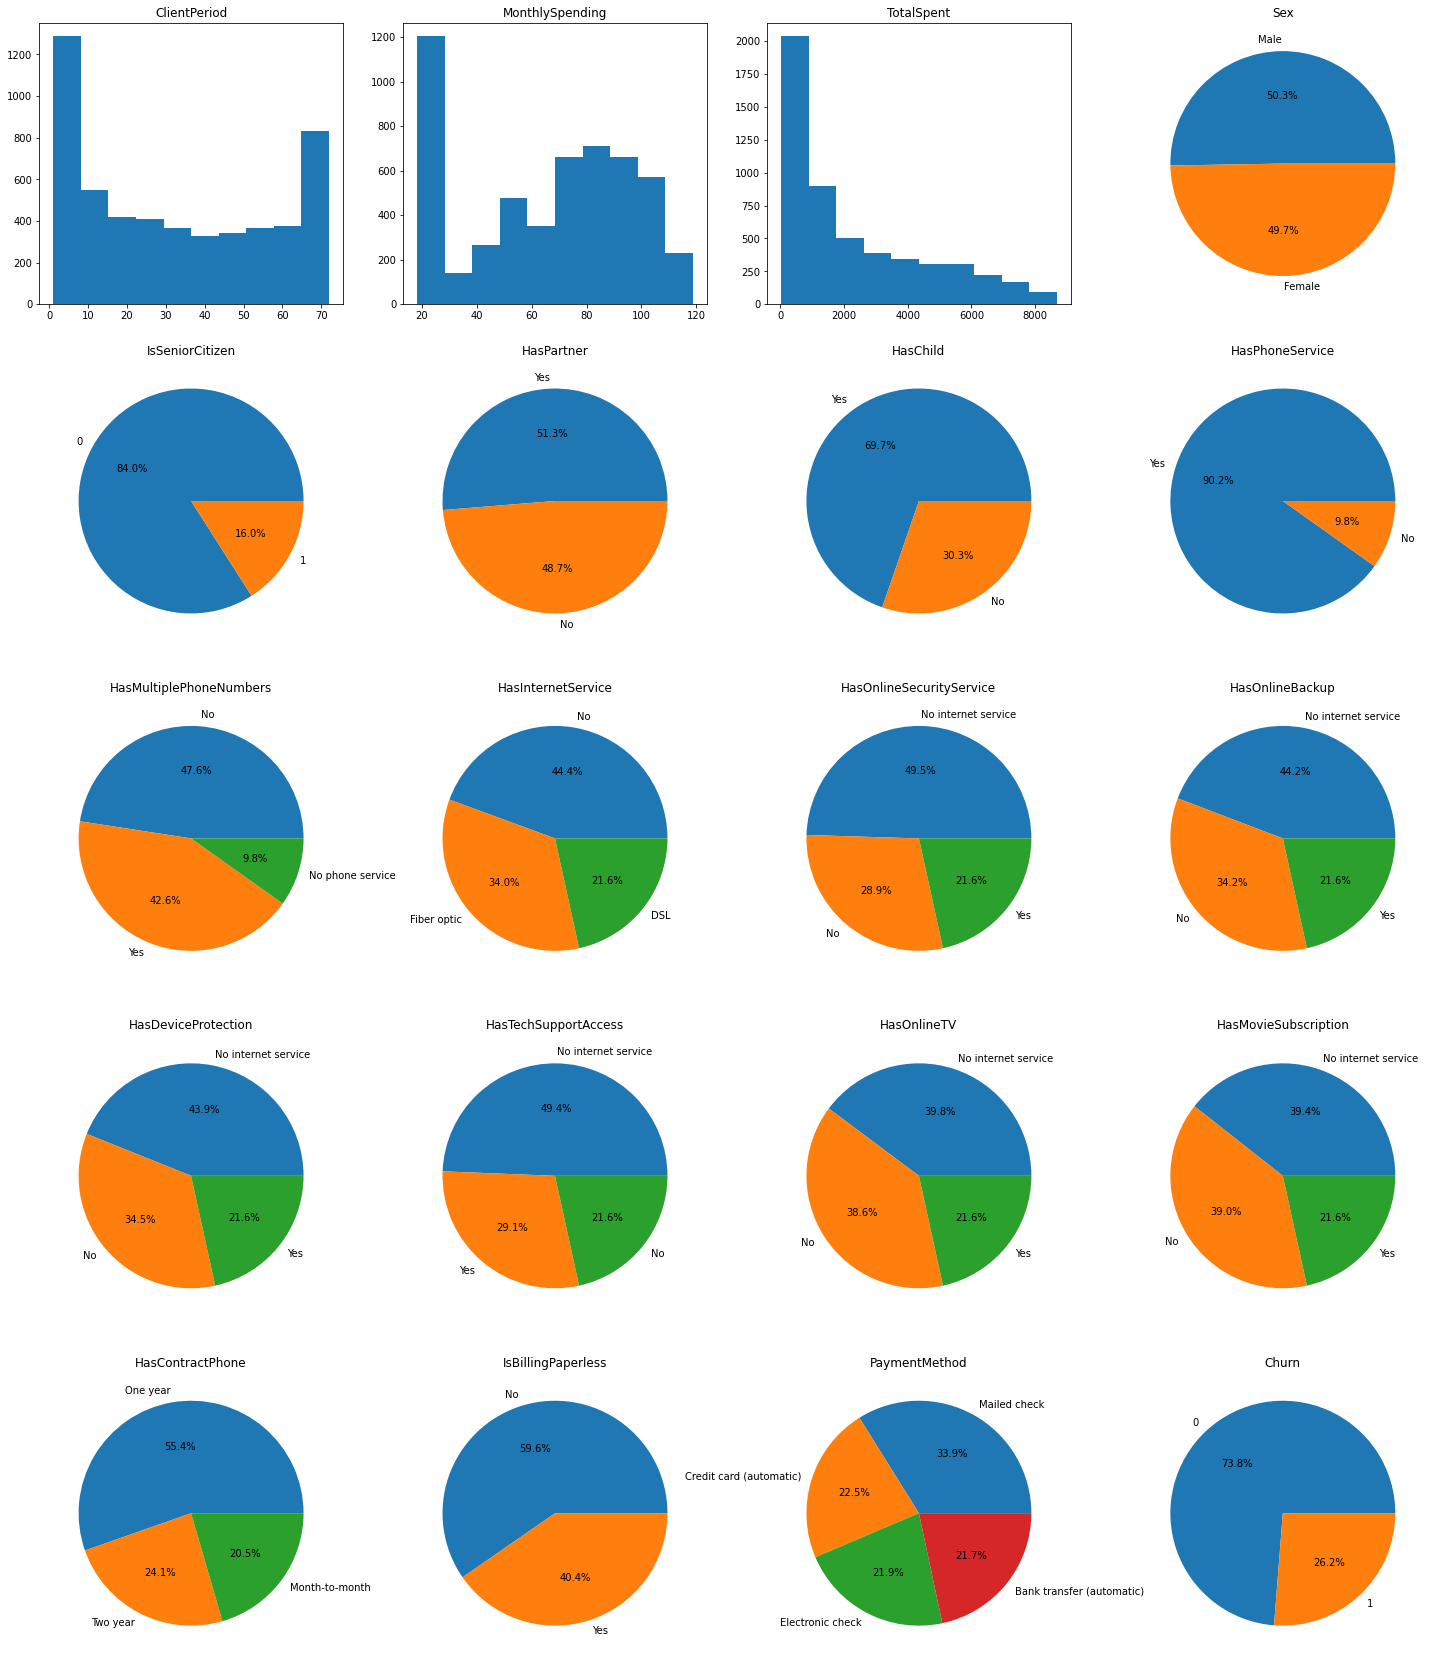

In [12]:
# Рассмотрим графики с целью визуальной оценки данных
plt.figure(figsize = (25,30))
for i in range(20):
    column_name = data.columns[i]
    ax = plt.subplot(5,4,i+1)
    
    ax.set_title(column_name)
    if(column_name in num_cols):
      ax.hist(data[column_name] )
    else:
      ax.pie(data[column_name].value_counts(), labels = data[column_name].unique(), autopct='%1.1f%%')


In [ ]:
# Целевую переменную можно назвать сбаланисрованной т.к. классы относятся как 3 к 1.
# Рассмотрев графики не было найдено выбросов, которые бы сильно могли повлиять на данные

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [13]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [14]:
# Создадим копию исходных данных перед обработкой
data_orig = data.copy()

In [15]:
# Закодируем категориальные признаки с помощью one-hot-encoding k-1 признаками
data = pd.get_dummies(data, cat_cols, drop_first=True)

In [16]:
# Обновим список с названиями категориальных колонок
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))

In [17]:
# Проведем нормировку числовых данных
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols_new])

X = pca.fit_transform(data[num_cols + cat_cols_new])

In [18]:
# Разделим выборку на тестовую и валидационную (в данном случае, т.к. тестовая выборка - это выборка с Kaggle)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, data[target_col], train_size=0.8, random_state = 10)

In [19]:
# Обучим логичестическую регрессию
clf = LogisticRegressionCV(scoring='roc_auc',refit=True, solver = "newton-cg").fit(X_train, y_train)

In [20]:
# Подобранный параметр С
clf.C_

array([21.5443469])

In [21]:
# Результат
clf.score(X_val, y_val)

0.8422754314008055

In [22]:
# Переведем имена колонок в численный вид
num_cols_indices = [ data_orig.columns.get_loc(a) for a in num_cols if a in data_orig]
cat_cols_indices = [ data_orig.columns.get_loc(a) for a in cat_cols if a in data_orig]

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
# Второе решение через GridSearchCV
# Создаем Pipeline

preprocessing_data = make_column_transformer(
    (StandardScaler(), num_cols_indices),
    (OneHotEncoder(drop = 'first'), cat_cols_indices))

pipe = make_pipeline(preprocessing_data, LogisticRegression())

param_grid = {'logisticregression__C': np.linspace(1, 200, 20),
    'logisticregression__solver': ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga']}
    
search = GridSearchCV(pipe, param_grid, cv = 5, scoring='roc_auc', refit=True)
search.fit(data_orig[num_cols + cat_cols].values, data_orig[target_col].values)
print(search.best_params_)
print(roc_auc_score(data[target_col], search.predict_proba(data_orig[num_cols + cat_cols])[:,1]))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

{'logisticregression__C': 126.68421052631578, 'logisticregression__solver': 'sag'}
0.8487912215720343


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

solver': 'sag'

C': 126.68421052631578

Качество: 0.8487912215720343

Качество на Kaggle: 0.84576


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [24]:
!pip install catboost

In [25]:
import catboost

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve

In [27]:
# Переведем названия категориальных столбцов в числовой вид
cat_cols_indices = [ data_orig.columns.get_loc(a) for a in cat_cols if a in data_orig]

In [28]:
# grid_search сам делит выборку в соотношении 80 на 20 и использует кросс-валидацию при обучении

boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols_indices,
                                             eval_metric='AUC:hints=skip_train~false')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(1, 9, 5),
                            'learning_rate': np.linspace(0.01, 0.03, 3),
                            'depth': np.linspace(3, 7, 5)}, 
                           cv = 5,
                           X = data_orig[num_cols + cat_cols], 
                           y = data_orig[target_col], plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8628166563
bestIteration = 197

0:	loss: 0.8628167	best: 0.8628167 (0)	total: 1.64s	remaining: 2m 1s

bestTest = 0.8645615225
bestIteration = 189

1:	loss: 0.8645615	best: 0.8645615 (1)	total: 3.13s	remaining: 1m 54s

bestTest = 0.8646229615
bestIteration = 164

2:	loss: 0.8646230	best: 0.8646230 (2)	total: 4.62s	remaining: 1m 50s

bestTest = 0.8629346191
bestIteration = 199

3:	loss: 0.8629346	best: 0.8646230 (2)	total: 6.13s	remaining: 1m 48s

bestTest = 0.8645762679
bestIteration = 199

4:	loss: 0.8645763	best: 0.8646230 (2)	total: 7.59s	remaining: 1m 46s

bestTest = 0.8642371249
bestIteration = 192

5:	loss: 0.8642371	best: 0.8646230 (2)	total: 9.08s	remaining: 1m 44s

bestTest = 0.8632663895
bestIteration = 194

6:	loss: 0.8632664	best: 0.8646230 (2)	total: 10.5s	remaining: 1m 42s

bestTest = 0.8644312719
bestIteration = 199

7:	loss: 0.8644313	best: 0.8646230 (2)	total: 12s	remaining: 1m 40s

bestTest = 0.8651587091
bestIteration = 189

8:	loss: 0.8651587	best: 0.86

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [29]:
boosting_model.get_params()

{'cat_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 'depth': 5.0,
 'eval_metric': 'AUC:hints=skip_train~false',
 'l2_leaf_reg': 1.0,
 'learning_rate': 0.03,
 'n_estimators': 200,
 'silent': True}

In [30]:
boosting_model.best_score_

{'learn': {'AUC': 0.8645158755166863, 'Logloss': 0.39241029857023774}}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

depth: 5.0

l2_leaf_reg': 1.0

learning_rate': 0.03

Качество: 0.8645158755166863

Качество Kaggle : 0.85186
 

# Предсказания

In [31]:
best_model = boosting_model

In [32]:
test_data = pd.read_csv('./test.csv')

submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(test_data)[:, 1]

submission.to_csv('./my_submission.csv' , index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

Лучший результат на Kaggle:  0.85186

Имя: Михаил_Лазуков

